<a href="https://colab.research.google.com/github/Arangojd26/Procesamiento-Imagen/blob/master/Clase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:

# importar librerias necesarias 

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/colab/images/'
os.chdir(path)
!pwd
# graficar imagenes estaticas en el notebook
%matplotlib inline  

/content/drive/My Drive/colab/images


In [0]:
# Display four images
def display4(a, b,c,d,title1 = "Original", title2 = "Edited", title3 = "Edited", title4 = "Edited"):
    plt.figure(figsize=(12,4))
    plt.subplot(141), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(142), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(143), plt.imshow(c,cmap='gray'), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.subplot(144), plt.imshow(d,cmap='gray'), plt.title(title4)
    plt.xticks([]), plt.yticks([])
    plt.show()

## **Gray Color Space**

In [9]:
img = cv2.imread('rub07.jpg')
height, width, channel = img.shape

img_grayscale = np.zeros((height,width,1))

'''
for i in np.arange(height):
    for j in np.arange(width):
        r = img.item(i,j,0)
        g = img.item(i,j,1)
        b = img.item(i,j,2)

        # RGB to Grayscale
        y = 0.299*r + 0.587*g + 0.144*b

        img_grayscale.itemset((i,j,0),int(y))

plt.figure(figsize=(10,4))
plt.imshow(img_grayscale)
plt.xticks([])
plt.yticks([])
plt.show()

'''


'\nfor i in np.arange(height):\n    for j in np.arange(width):\n        r = img.item(i,j,0)\n        g = img.item(i,j,1)\n        b = img.item(i,j,2)\n\n        # RGB to Grayscale\n        y = 0.299*r + 0.587*g + 0.144*b\n\n        img_grayscale.itemset((i,j,0),int(y))\n\nplt.figure(figsize=(10,4))\nplt.imshow(img_grayscale)\nplt.xticks([])\nplt.yticks([])\nplt.show()\n\n'

## **BGR Color-Space**

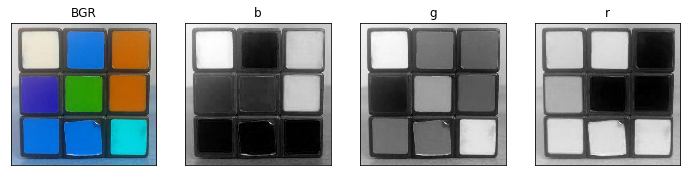

In [12]:
# leer una imagen 
# principle of least astonishment  (surprice)
img_BGR=cv2.imread('rub07.jpg',cv2.IMREAD_COLOR)
#b,g,r = cv2.split(img_BGR)

b = img_BGR[:,:,0]
g = img_BGR[:,:,1]
r = img_BGR[:,:,2]

display4(img_BGR,b,g,r,"BGR","b","g","r")


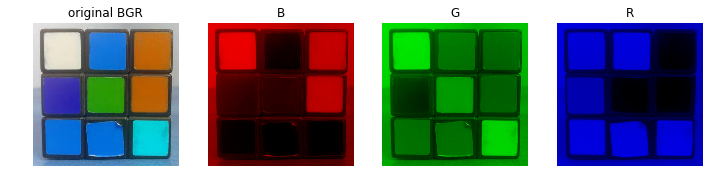

In [13]:
count = 2
plt.figure(figsize=(12,4))
plt.subplot(1,4,1), plt.imshow(img_BGR/255.0), plt.title("original BGR")    
plt.axis("off")
for i, lab in enumerate(["B","G","R"]):
    crgb = np.zeros(img_BGR.shape)
    crgb[:,:,i] = img_BGR[:,:,i]
    plt.subplot(1,4,count), plt.imshow(crgb/255.0), plt.title(lab) 
    plt.axis("off")
    count += 1
    
plt.show()

## **RGB Color-Space**

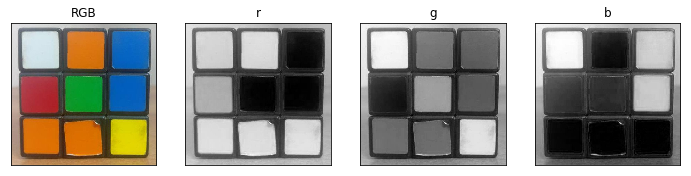

In [14]:
# pasar la imagen a rgb
img_RGB=cv2.cvtColor(img_BGR,cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(img_RGB)

display4(img_RGB,r,g,b,"RGB","r","g","b")



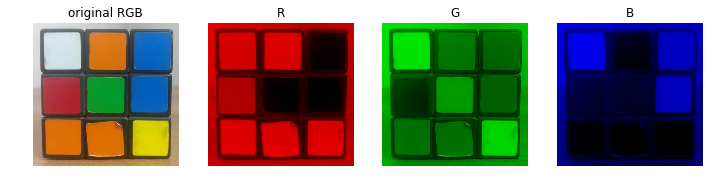

In [15]:
count = 2
plt.figure(figsize=(12,4))
plt.subplot(1,4,1), plt.imshow(img_RGB/255.0), plt.title("original RGB")    
plt.axis("off")
for i, lab in enumerate(["R","G","B"]):
    crgb = np.zeros(img_RGB.shape)
    crgb[:,:,i] = img_RGB[:,:,i]
    plt.subplot(1,4,count), plt.imshow(crgb/255.0), plt.title(lab) 
    plt.axis("off")
    count += 1
    
plt.show()

## **LAB Color-Space**

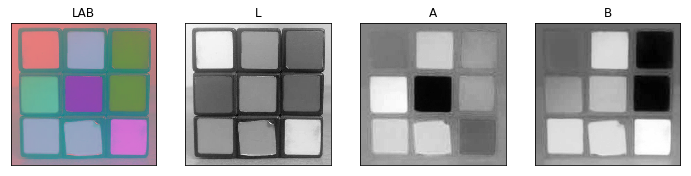

In [16]:
img_LAB=cv2.cvtColor(img_BGR, cv2.COLOR_BGR2LAB);
L,A,B = cv2.split(img_LAB)
display4(img_LAB,L,A,B,"LAB","L","A","B")


In [0]:
from skimage.color import rgb2lab, lab2rgb
def one_chanel_LAB_convert_to_RGB(image,idim):
    '''
    image is a single lab image of shape (None,None,3)
    '''
    z = np.zeros(image.shape)
    if idim != 0 :
        z[:,:,0]=80 ## I need brightness to plot the image along 1st or 2nd axis
    z[:,:,idim] = image[:,:,idim]
    z = lab2rgb(z)
    return(z)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


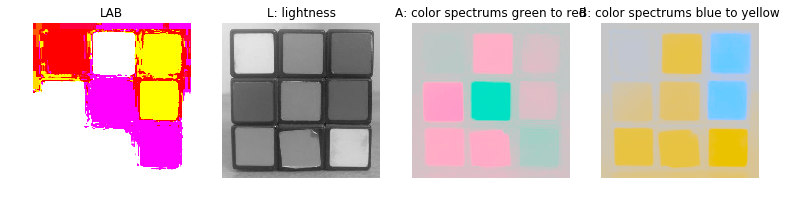

In [18]:
#img_BGR *= 1./255;
img_LAB=cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB);
img_LAB=rgb2lab(img_LAB)

count = 1
plt.figure(figsize=(13,4))

plt.subplot(1,4,1) 
plt.imshow(img_LAB), plt.title("LAB"),plt.axis("off")
    
plt.subplot(1,4,2) 
lab_rgb_gray = one_chanel_LAB_convert_to_RGB(img_LAB,0) 
plt.imshow(lab_rgb_gray), plt.title("L: lightness"),plt.axis("off")

plt.subplot(1,4,3) 
lab_rgb_gray = one_chanel_LAB_convert_to_RGB(img_LAB,1) 
plt.imshow(lab_rgb_gray), plt.title("A: color spectrums green to red"),plt.axis("off")

plt.subplot(1,4,4) 
lab_rgb_gray = one_chanel_LAB_convert_to_RGB(img_LAB,2) 
plt.imshow(lab_rgb_gray), plt.title("B: color spectrums blue to yellow"),plt.axis("off")

plt.show()



## **YCrCb Color-Space**

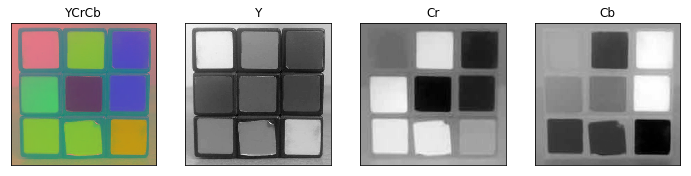

In [0]:
img_YCrCb=cv2.cvtColor(img_BGR, cv2.COLOR_BGR2YCrCb);
Y,Cr,Cb = cv2.split(img_YCrCb)
display4(img_YCrCb,Y,Cr,Cb,"YCrCb","Y","Cr","Cb")

## **HSV Color Space**

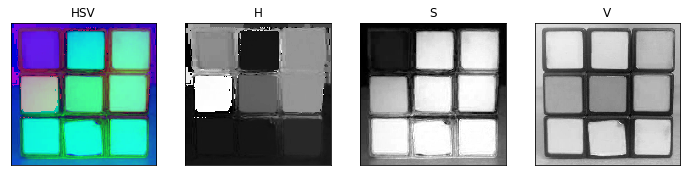

In [0]:
img_HSV=cv2.cvtColor(img_BGR, cv2.COLOR_BGR2HSV);
H,S,V = cv2.split(img_HSV)
display4(img_HSV,H,S,V,"HSV","H","S","V")